# Week 2 Assignment
## MBP 1201 - Introductory Biostatistics


## Submission format
This assignment should be submitted on Quercus by Oct 3, 11:59 pm.

Your submission should consist of a single file:

1. `FIRSTNAME_LASTNAME.STUDENTNUMBER.ipynb` containing all of the Python code you’ve used to generate your plots and results, as well as plain-text answers to questions that require an explanation. 


## Exercise 1. Calculating z-scores (5 marks)

Blood glucose level for obese patients have a mean of 120 with a standard deviation of 45. A researcher thinks that a diet high in raw cornstarch will have a positive or negative effect on blood glucose levels. A sample of 30 patients who have tried the raw cornstarch diet have a mean glucose level of 140. Test the hypothesis that the raw cornstarch had an effect at each of the following significance levels: 0.01, 0.05, and 0.10. Remember to:

* State your null and alternate hypotheses, along with your alpha level. Identify the type of the test to be run.
* Find the z-score associated with the alpha level and the test statistic. Hint: make a `zscore_from_alpha` function using the PPF function from `scipy.stats.norm`, which satisfies $PPF(CDF(Z)) = Z$ and $CDF(PPF(\alpha)) = \alpha$. 
* State whether you will use the upper or lower $z^*$ cutoff value
* State if you will reject the null hypothesis or not.

What is the effect of raising the significance level on the conclusion you draw? the rate of false positives? the rate of false negatives?

In [6]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, shapiro, kstest
from statsmodels.api import qqplot
from functools import partial
from statsmodels.distributions.empirical_distribution import ECDF

**Null hypothesis**: the raw cornstarch had no effect at each of the following significance levels: 0.01, 0.05 and 0.10.\
**Alternative hypothesis**: the raw cornstarch had an effect at each of the following significance levels: 0.01, 0.05 and 0.10.\
Since we know the population mean and standard deviation of the data, we can use the <u>**Two-tailed Z Statistic Test**</u> to verify our hypothesis.

In [7]:
def zscore_from_alpha(alpha):
    # perform two-tailed z-score test
    p = 1 - alpha / 2
    return norm.ppf(p)

alphas = [0.01, 0.05, 0.1]
pop_mean = 120
pop_std = 45
sample_mean = 140
N = 30
z140 = (sample_mean - pop_mean) / (pop_std / np.sqrt(N))
print(f'The z-score for a sample of N=30 with an average glucose level of 140 is {z140}')
pzs = round(1 - norm.cdf(z140),2)
for alpha in alphas:
    z_cut = zscore_from_alpha(alpha)
    print(f'The z-cutoff value at significance level {alpha} is: {z_cut}')

The z-score for a sample of N=30 with an average glucose level of 140 is 2.4343224778007384
The z-cutoff value at significance level 0.01 is: 2.5758293035489004
The z-cutoff value at significance level 0.05 is: 1.959963984540054
The z-cutoff value at significance level 0.1 is: 1.6448536269514722


I plan to use the <u>**upper $z^*$ cutoff value**</u> to do the test, since the z-score of the sample is a positive value and it is rational to use upper cutoff value for the comparison.
- Since the z-score for the sample is smaller than the z-cutoff value at significance level 0.01, <U>**we fail to reject the null hypothesis at this significance level**.</u>
- Since the z-score for the sample is larger than the z-cutoff value at significance level 0.05, <U>**we reject the null hypothesis at this significance level**.</u>
- Since the z-score for the sample is larger than the z-cutoff value at significance level 0.10, <U>**we reject the null hypothesis at this significance level**.</u>

<u>**From the above conclusion, it is clear that increasing the $\alpha$ (decreasing the significant level) will decrease the $z^*$ cutoff value and make it more power to reject the null hypothesis. When increasing the $\alpha$ (decreasing the significant level), the critical value line is moving towards the center of null hypothesis, the False Positive Rate (Type I error) will be increased and the False Negative Rate (Type II error) will be decreased. While decreasing the $\alpha$ (increasing the significant level), the critical value line is moving towards the extrema of null hypothesis, the False Positive Rate (Type I error) will be decreased and the False Negative Rate (Type II error) will be increased.**</u>

## Exercise 2. Type I and Type II Error (5 marks)

To graphically illustrate type I and II error, plot a hypothesized and actual distribution’s PDFs, with some degree of overlap between them. Without loss of generality, suppose that the hypothesized distribution has a lower mean value than the actual distribution. Draw a vertical line (`plt.axvline()`) in the region of overlap, simulating the critical value. 

Shade the region (`plt.fill_between()`) corresponding to the probability of the type II error, or $\beta$ (i.e. the proportion of observations you’d consider a negative even though you shouldn’t), at the critical value.

Additionally, shade the region corresponding to the probability of the type I error (i.e. the proportion of observations you'd consider a positive even though you shouldn't), at the critical value.

What happens to the chance of type I and type II error as the overlap between actual and hypothesized distributions goes down? Sketch another set of probability density function to illustrate your point.

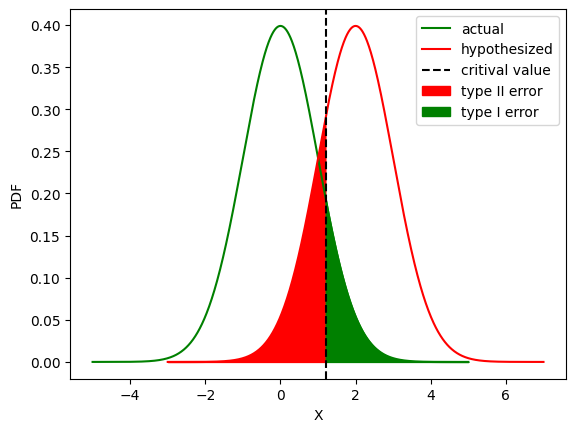

In [8]:
# Hint: Use norm.pdf()
x1 = np.linspace(-5, 5, 1000)
x2 = np.linspace(-5, 5, 1000)
pdf1 = norm.pdf(x1)
pdf2 = norm.pdf(x2)
plt.plot(x1, pdf1, color = "g")
plt.plot(x2+2, pdf2, color = "r")
plt.axvline(1.2, color='black', linestyle='--')
plt.fill_between(x2+2, pdf2, 0, where=(x2+2>=-5)&(x2+2<=1.2), color='r')
plt.fill_between(x1, pdf1, 0, where=(x1>=1.2)&(x2<=5), color='g')
plt.xlabel('X')
plt.ylabel('PDF')
plt.legend([ 'actual', 'hypothesized', 'critival value', 'type II error', 'type I error'])
plt.show()

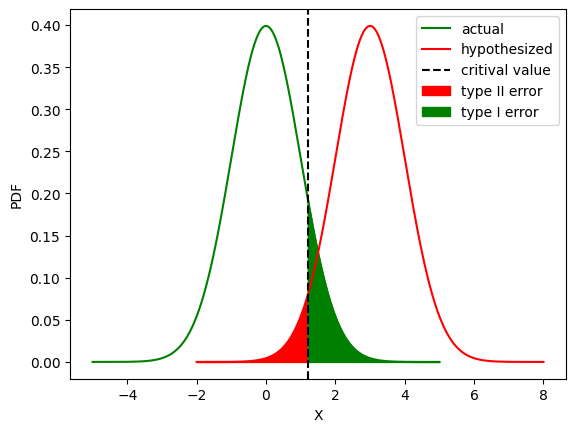

In [9]:
x1 = np.linspace(-5, 5, 1000)
x2 = np.linspace(-5, 5, 1000)
pdf1 = norm.pdf(x1)
pdf2 = norm.pdf(x2)
plt.plot(x1, pdf1, color = "g")
plt.plot(x2+3, pdf2, color = "r")
plt.axvline(1.2, color='black', linestyle='--')
plt.fill_between(x2+3, pdf2, 0, where=(x2+3>=-5)&(x2+3<=1.2), color='r')
plt.fill_between(x1, pdf1, 0, where=(x1>=1.2)&(x2<=5), color='g')
plt.xlabel('X')
plt.ylabel('PDF')
plt.legend(['actual', 'hypothesized', 'critival value', 'type II error', 'type I error'])
plt.show()

**When the area of overlap between actual and hypothesized distribution goes down and the critical value (significance level) keeps unchanged, the type I error will not change but type II error will decrease, like the plot shows above.**

## Exercise 3. Bayesian statistics in disease diagnosis (5 marks)
Mammograms are a common way to detect breast cancer, with 80% accuracy in detecting cancerous tumors and 90% accuracy in detecting benign tumors. A 70-year old woman with a BRCA1 mutation initially has a 65% risk of breast cancer by this age, but has a negative mammogram result, i.e. a benign tumor is detected. What is the probability she has a cancerous tumor at the time of the mammogram?

What would be the probability the tumor was cancerous if, instead of a mammogram, she receives a negative result on a breast MRI with 95% sensitivity and 95% specificity?

- Problem 1\
According to the problem statement, let's firstly define two events. A: BRCA1 woman has cancerous tumor; B: positive mammogram result.\
$P(B|A) = 0.8, P(-B|-A) = 0.9, P(-B|A) = 1-0.8=0.2, P(B|-A) = 1-0.9 = 0.1, P(A)=0.65, P(-A)=1-0.65=0.35$. This problem needs to compute $P(A|-B)$.\
According to the Bayesian theorem, $P(A|-B) = {P(-B|A) * P(A) \over P(-B)}={P(-B|A) * P(A) \over {P(-B|A)*P(A)+P(-B|-A)*P(-A)}}={{0.2*0.65}\over{0.2*0.65+0.9*0.35}}=0.29=29\%$

<u>**Therefore, the probability she has a cancerous tumor at the time of the mammogram is 29%.**</u>

- Problem 2\
According to the problem statement, let's firstly define two events. A: BRCA1 woman has cancerous tumor; B: positive MRI result.\
$P(B|A) = 0.95, P(-B|-A) = 0.95, P(-B|A) = 1-0.95=0.05, P(B|-A) = 1-0.95 = 0.05, P(A)=0.65, P(-A)=1-0.65=0.35$. This problem needs to compute $P(A|-B)$.\
According to the Bayesian theorem, $P(A|-B) = {P(-B|A) * P(A) \over P(-B)}={P(-B|A) * P(A) \over {P(-B|A)*P(A)+P(-B|-A) * P(-A)}}={{0.05*0.65}\over{0.05*0.65+0.95*0.35}}=0.089=8.9\%$

<u>**Therefore, the probability she has a cancerous tumor while she receives a negative result in breast MRI is 8.9%.**</u>

## Exercise 4. Normality Tests (5 marks)

Many statistical tests require the input distributions to be normal, or follow a Gaussian probability density function. We're going to investigate a couple of tests to determine if an arbitrary distribution can be considered normal. For this problem, we'll use the `np.random.normal()` function to generate a synthetic dataset `X` with mean 5 and standard deviation 1 from a normal distribution. 

### 4A - QQ Plots
Plot a histogram of X. Does it look visually normal? Use the `qqplot()` function to generate a Quantile-Quantile plot of X. Do the points align well with the identity line $y=x$?

### 4B - Shapiro-Wilk Test

The Shapiro-Wilk test determines whether a distribution is normal or not. Is X normal, when using the Shapiro-Wilk test? ($\alpha$=0.05) 

### 4C - Kolmogorov-Smirnov Test

The Kolmogorov-Smirnov test compares two distributions $A$ and $B$ to determine if they are statistically the same distribution. In this case, we will use it to determine if a random distribution is normally distributed. What is the KS statistic of X with respect to the normal CDF `norm.cdf`? Is this statistically significant at the level $\alpha=0.05$? 

*Note*: I've provided a function `CDF` below that shifts `norm.cdf` by the mean of X and scales it by the standard deviation of `X`. 

### 4D (Optional - Bonus 1 Mark)
Show that the KS statistic above is equal to (numerically within 1e-3 is fine)
$$ D = \max_{x \in X}|\mathrm{ECDF}(x) - \mathrm{CDF}(x)|.$$

In [10]:
np.random.seed(2)

X = np.random.normal(loc=5, scale=1, size=1000)

CDF = partial(norm.cdf, loc=5, scale=1)

- Problem 4A\
<u> **The histogram plot looks normal and the data does not fit well on the identity line $y=x$** </u>

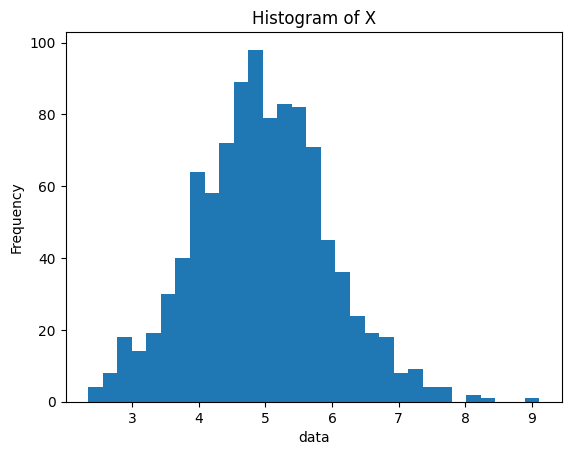

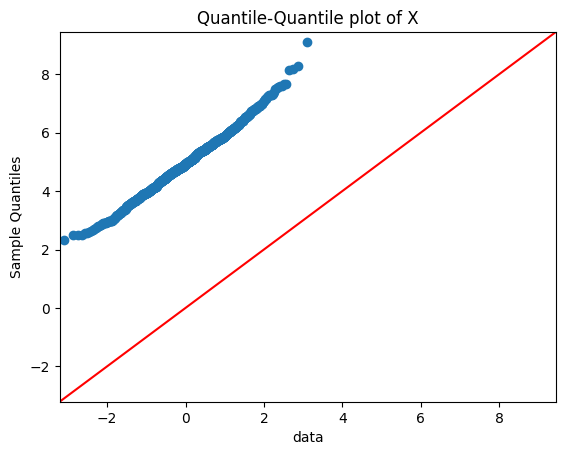

In [11]:
# plot the histogram of X
_,_,_ = plt.hist(X, bins=int(np.sqrt(X.size)))
plt.xlabel('data')
plt.ylabel('Frequency')
plt.title('Histogram of X')
plt.show()

# Quantile-Quantile plot of X
_ = qqplot(X, line='45')
plt.xlabel('data')
plt.ylabel('Sample Quantiles')
plt.title('Quantile-Quantile plot of X')
plt.show()

- Problem 4B\
**The data X is approxiamtely normal since p-value of the Shapiro-Wilk test is 0.014 which is smaller than $\alpha(\alpha=0.05)$. This means we reject the null hypothesis that the data is normal.**

In [12]:
res_shapiro = shapiro(X)
print(f'Statistics of the Shapiro-Wilk test: {round(res_shapiro.statistic,3)}\np-value of the Shapiro-Wilk test: {round(res_shapiro.pvalue,2)}')

Statistics of the Shapiro-Wilk test: 0.996
p-value of the Shapiro-Wilk test: 0.01


- Problem 4C\
**Since the p-value of Kolmogorov-Smirnov test is 0.1257 that is larger than $\alpha(\alpha=0.05)$, which means we fail to reject the null hypothesis that data X is normally distributed**


In [13]:
res_kstest = kstest(X, CDF)
print(f'Statistics of the Kolmogorov-Smirnov test: {round(res_kstest.statistic,3)}\np-value of the Kolmogorov-Smirnov test: {round(res_kstest.pvalue,2)}')

Statistics of the Kolmogorov-Smirnov test: 0.037
p-value of the Kolmogorov-Smirnov test: 0.13


- Problem 4D (Bonus)\
**The statistics of the Kolmogorov-Smirnov test is eqaul to the $D = \max_{x \in X}|\mathrm{ECDF}(x) - \mathrm{CDF}(x)|$ within 1e-3**

In [14]:
ecdf = ECDF(X)
D = np.max(abs(ecdf(X) - CDF(X)))
print(f'Maximum absolute value of the difference between ECDF and CDF of X is: {round(D,3)} which is equal to the statistics of the the Kolmogorov-Smirnov test we get from Problem 4C.')

Maximum absolute value of the difference between ECDF and CDF of X is: 0.037 which is equal to the statistics of the the Kolmogorov-Smirnov test we get from Problem 4C.
